# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file = 'dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---
## Step 0: Load The Data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

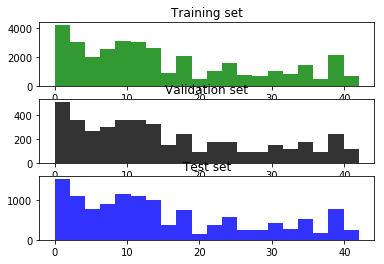

In [3]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
atrain = fig.add_subplot(311)
avalid = fig.add_subplot(312)
atest = fig.add_subplot(313)

numBins = 20
atrain.hist(y_train,numBins,color='green',alpha=0.8)
atrain.set_title("Training set")
avalid.hist(y_valid,numBins,color='black',alpha=0.8)
avalid.set_title("Validation set")
atest.hist(y_test,numBins,color='blue',alpha=0.8)
atest.set_title("Test set")
plt.show()

1


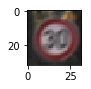

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
index = random.randint(0, len(X_train)-1)
image = X_train[index]

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

# convert to grayscale; didn't improve performance
#X_train[...,0] = np.dot(X_train[...,:3], [0.299, 0.587, 0.114])
#X_valid[...,0] = np.dot(X_valid[...,:3], [0.299, 0.587, 0.114])
#X_test[...,0] = np.dot(X_test[...,:3], [0.299, 0.587, 0.114])
#X_train = np.delete(X_train, [1, 2], 3)
#X_valid = np.delete(X_valid, [1, 2], 3)
#X_test = np.delete(X_test, [1, 2], 3)

X_train, y_train = shuffle(X_train, y_train)

# normalize
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_valid = (X_valid - np.mean(X_valid))/np.std(X_valid)
X_test = (X_test - np.mean(X_test))/np.std(X_test)


### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    C = int(x.shape[3])
    conv1 = tf.layers.conv2d(inputs=x, filters=6*C, kernel_size= 5, padding="valid", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=2, strides=2)
    conv2 = tf.layers.conv2d(inputs=pool1, filters=16*C, kernel_size=5, padding="valid", activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=2, strides=2)
    flat2 = flatten(pool2)
    dense3 = tf.layers.dense(flat2, 120*C, activation=tf.nn.relu, use_bias=True)
    dense4 = tf.layers.dense(dense3, 84*C, activation=tf.nn.relu, use_bias=True)
    logits = tf.layers.dense(dense4, n_classes, use_bias=True)
    
    return logits

x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...

EPOCH 1 ...
Training Accuracy = 0.970
Validation Accuracy = 0.892

EPOCH 2 ...
Training Accuracy = 0.987
Validation Accuracy = 0.919

EPOCH 3 ...
Training Accuracy = 0.994
Validation Accuracy = 0.924

EPOCH 4 ...
Training Accuracy = 0.997
Validation Accuracy = 0.939

EPOCH 5 ...
Training Accuracy = 0.996
Validation Accuracy = 0.945

EPOCH 6 ...
Training Accuracy = 0.997
Validation Accuracy = 0.949

EPOCH 7 ...
Training Accuracy = 0.995
Validation Accuracy = 0.945

EPOCH 8 ...
Training Accuracy = 0.999
Validation Accuracy = 0.950

EPOCH 9 ...
Training Accuracy = 0.999
Validation Accuracy = 0.957

EPOCH 10 ...
Training Accuracy = 0.996
Validation Accuracy = 0.951

Model saved
Test Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

predict_file = 'dataset/predict.p'

with open(predict_file, mode='rb') as f:
    predict = pickle.load(f)
    
X_predict, y_predict = predict['features'], predict['labels']

assert(len(X_predict) == len(y_predict))

n_predict = len(X_predict)
image_shape = X_predict[0].shape
print("Number of prediction examples =", n_predict)
print("Image shape: ", image_shape)

Number of prediction examples = 5
Image shape:  (32, 32, 3)


13


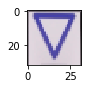

In [9]:
index = random.randint(0, len(X_predict)-1)
image = X_predict[index]

# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_predict[index])

Predictions:
Image 1 - Yield
Image 2 - General caution
Image 3 - No passing for vehicles over 3.5 metric tons
Image 4 - Road work
Image 5 - Speed limit (30km/h)

Top predictions with probabilities

Image 1 : 
Yield - 71%
Ahead only - 31%
Bumpy road - 10%
Keep right - 10%
No passing - 7%

Image 2 : 
General caution - 56%
Traffic signals - 20%
Right-of-way at the next intersection - 15%
Go straight or right - 10%
Pedestrians - 8%

Image 3 : 
No passing for vehicles over 3.5 metric tons - 49%
No passing - 27%
Go straight or left - 18%
End of no passing - 13%
Ahead only - 13%

Image 4 : 
Road work - 12%
Bicycles crossing - 12%
Speed limit (30km/h) - 11%
Stop - 10%
Speed limit (20km/h) - 8%

Image 5 : 
Speed limit (30km/h) - 43%
End of speed limit (80km/h) - 22%
Speed limit (80km/h) - 16%
Speed limit (20km/h) - 14%
Speed limit (70km/h) - 10%


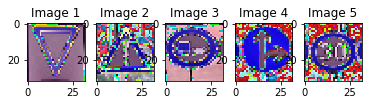

In [10]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import csv

with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    labels = {}
    for row in reader:
        label = int(row[0])
        description = row[1]
        labels.update({label: description})
X_predict, y_predict = shuffle(X_predict, y_predict)

# normalize
X_predict = (X_predict - np.mean(X_predict))/np.std(X_predict)

prediction_operation = tf.argmax(logits, 1)
top5_operation = tf.nn.top_k(logits, k=5)

def predict(X_data, y_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    prediction = []
    top5 = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        prediction.append(sess.run(prediction_operation, feed_dict={x: batch_x, y: batch_y}))
        top5.append(sess.run(top5_operation, feed_dict={x: batch_x, y: batch_y}))
        prediction = prediction[0]
        top5 = top5[0]
    return np.array(prediction), top5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    [prediction, top5] = predict(X_predict, y_predict)
    # Visualizations will be shown in the notebook.
    %matplotlib inline
    fig = plt.figure()
    print('Predictions:')
    for i in range(n_predict):
        image = X_predict[i]
        ax = fig.add_subplot(str(151+i))
        index = prediction[i]
        txt = 'Image {} - '.format(i+1)+labels[index]
        print(txt)
        ax.set_title("Image "+str(i+1))
        plt.imshow(image)
        
    print()
    print('Top predictions with probabilities')
    probs = top5[0]
    indices = top5[1]
    for i in range(n_predict):
        print()
        txt = 'Image {} : '.format(i+1)
        print(txt)
        for j in range(len(probs)):
            index = int(indices[i][j])
            prob = probs[i][j]
            txt = labels[index] + ' - ' + '{0:.0f}'.format(prob) + '%'
            print(txt)


### Predict the Sign Type for Each Image

### Analyze Performance

In [11]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict_accuracy = evaluate(X_predict, y_predict)
    print("Test Accuracy = {:.0f}%".format(predict_accuracy*100))

Test Accuracy = 80%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = top5[0]
n = len(softmax)
print('Top five softmax probabilities:')
for i in range(n):
    txt = 'For image {}: '.format(i+1) + ', '.join('{:.2f}%'.format(k) for k in softmax[i])
    print(txt)

Top five softmax probabilities:
For image 1: 70.66%, 30.99%, 10.46%, 10.00%, 6.91%
For image 2: 56.01%, 19.94%, 14.97%, 10.03%, 8.31%
For image 3: 49.09%, 27.41%, 17.85%, 13.24%, 13.04%
For image 4: 12.33%, 11.76%, 11.22%, 9.86%, 7.80%
For image 5: 43.47%, 21.68%, 15.91%, 13.74%, 10.33%


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

#Traffic Sign Recognition

##Writeup

Build a Traffic Sign Recognition Project

The goals / steps of this project are the following:

    Load the data set (see below for links to the project data set)
    Explore, summarize and visualize the data set
    Design, train and test a model architecture
    Use the model to make predictions on new images
    Analyze the softmax probabilities of the new images
    Summarize the results with a written report

Rubric Points

Here I will consider the rubric points individually and describe how I addressed each point in my implementation.

Writeup / README

####1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

Here is a link to my project code: 

###Data Set Summary & Exploration

####1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the pandas library to calculate summary statistics of the traffic signs data set:

    The size of training set is 34799
    The size of the validation set is 4410
    The size of test set is 12630
    The shape of a traffic sign image is (32, 32, 3)
    The number of unique classes/labels in the data set is 43

####2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data classification is distributed.

![histogram](histogram.png)

###Design and Test a Model Architecture

####1. Describe how you preprocessed the image data.

I decided not to convert the images to grayscale because it diminished the validation accuracy below 80%.

I normalized the image data because gradient descent runs more efficiently with normalized data.

####2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.)

My final model consisted of the following layers:
Layer 	            Description
Input 	            32x32x3 RGB image
Convolution 5x5 	1x1 stride, valid padding, outputs 28x28x18
RELU 	
Max pooling 	    2x2 stride, outputs 14x14x18
Convolution 5x5 	1x1 stride, valid padding, outputs 10x10x48
Max pooling         2x2 stride, outputs 5x5x48
Flatten             outputs 1200
Fully connected 	outputs 360
Fully connected     outputs 252
Fully connected     output layer, outputs 43 	        
	
	

####3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used an AdamOptimizer with the default learning rate of 0.001, a batch size of 128, and 10 epochs.

####4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

I used the LeNet implementation, scaling it up to use RGB images.

My final model results were:

    validation set accuracy of 0.951
    test set accuracy of 0.933

If an iterative approach was chosen:

    The first architecture I tried was LeNet and I chose it because it solves a similar image classification problem.
    Some problems with the initial architecture where in the decision of whether there too many dense layers.
    The architecture was minimally adjusted to accomodate RGB images. A high accuracy on the validation set was obtained.
    I used the standard parameterswith no adjustment. A convolution layer worked well with this problem because image
    features classified by scaling up from detailed features into overall features is a very well-adapted technique for
    image classification that is implemented with convolutional layers.

If a well known architecture was chosen:

    The Le Net architecture was chosen.
    It was relevant to the traffic sign application because it was successful with the MNIST database of images.
    The final model's accuracy on the validation and test set where comparably on the 95% level which means they are
    accurate.

###Test a Model on New Images

####1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

![image 1](jpgs/t36.jpg)  ![image 1](jpgs/t10.jpg)  ![image 1](jpgs/t13.jpg)  ![image 1](jpgs/t01.jpg)  ![image 1](jpgs/t18.jpg)

The first image might be difficult to classify because there are slight portions of other signage in it.

####2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:
Go straight or right, No passing for vehicles over 3.5 metric tons, Yield, Speed limit (30km/h), General caution

The model was able to correctly guess 5 of the 5 traffic signs, which gives an accuracy of 100%. This compares favorably to the accuracy on the test set of 94%.

####3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is not so sure that this is a "Go straight or right" (probability of 0.2), but the other probabilities are lower at 14%, 14% and 13%. The top five soft max probabilities were
Probability 	Prediction
.20 	Stop sign
.17 	U-turn
.05 	Yield
.04 	Bumpy Road
.01 	Slippery Road

For the second image ...

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [1]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")